In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from collections import Counter
import cv2
from tqdm import tqdm

In [2]:
data_path = '../data/raw/plant_village_dataset/color/'

In [3]:
classes = os.listdir(data_path)
print(f"Found {len(classes)} classes: {classes}")

Found 38 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spo

In [4]:
class_counts = {}
for class_name in classes:
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(images)

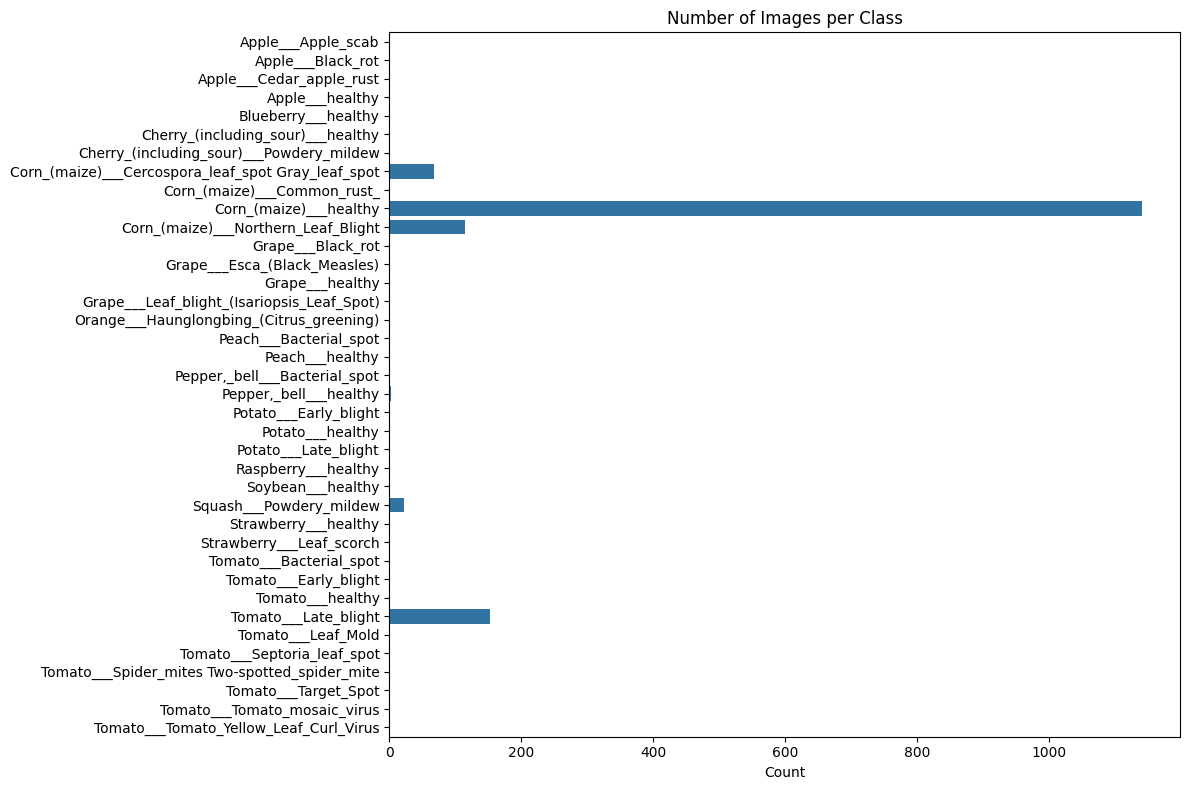

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x=list(class_counts.values()), y=list(class_counts.keys()))
plt.title('Number of Images per Class')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

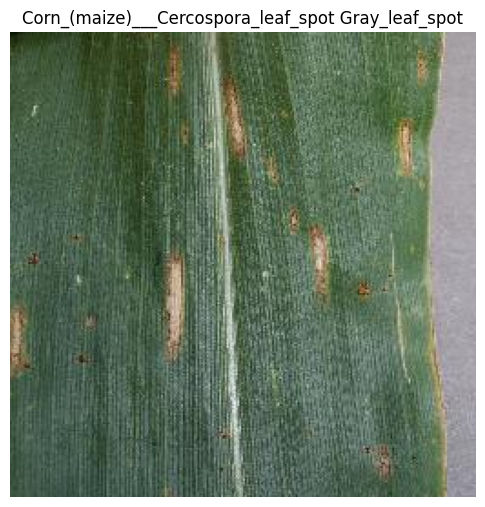

In [6]:
plt.figure(figsize=(15, 15))
for i, class_name in enumerate(list(class_counts.keys())[:9]):  # Show first 9 classes
    try:
        class_path = os.path.join(data_path, class_name)
        images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        if not images:
            print(f"Warning: No valid images found in class {class_name}")
            continue
            
        sample_image = random.choice(images)
        img = Image.open(os.path.join(class_path, sample_image))
        
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    except Exception as e:
        print(f"Error processing class {class_name}: {str(e)}")
        continue

plt.tight_layout()
plt.show()

In [7]:
img_sizes = []
for class_name in list(class_counts.keys())[:3]:  # Analyze first 3 classes
    class_path = os.path.join(data_path, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    for img_file in images[:10]:  # Check first 10 images
        img = Image.open(os.path.join(class_path, img_file))
        img_sizes.append(img.size)

print(f"Image size statistics: {set(img_sizes)}")

Image size statistics: set()


In [8]:
print(f"Current working directory: {os.getcwd()}")
print(f"Full data path: {os.path.abspath(data_path)}")
print(f"Directory exists: {os.path.exists(data_path)}")

Current working directory: c:\Users\laksh\Crop-disease-detection\notebooks
Full data path: c:\Users\laksh\Crop-disease-detection\data\raw\plant_village_dataset\color
Directory exists: True


In [9]:
def verify_dataset_structure():
    """Verify the dataset structure and paths"""
    print(f"Checking dataset structure...")
    print(f"Data path: {os.path.abspath(data_path)}")
    
    if not os.path.exists(data_path):
        print(f"Error: Color dataset path not found at {data_path}")
        return False
        
    classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
    print(f"Found {len(classes)} disease classes:")
    for cls in classes:
        class_path = os.path.join(data_path, cls)
        n_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        print(f"- {cls}: {n_images} images")
    
    return True

# Add this cell to verify structure before processing
verify_dataset_structure()

Checking dataset structure...
Data path: c:\Users\laksh\Crop-disease-detection\data\raw\plant_village_dataset\color
Found 38 disease classes:
- Apple___Apple_scab: 0 images
- Apple___Black_rot: 0 images
- Apple___Cedar_apple_rust: 0 images
- Apple___healthy: 0 images
- Blueberry___healthy: 0 images
- Cherry_(including_sour)___healthy: 0 images
- Cherry_(including_sour)___Powdery_mildew: 0 images
- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 67 images
- Corn_(maize)___Common_rust_: 0 images
- Corn_(maize)___healthy: 1141 images
- Corn_(maize)___Northern_Leaf_Blight: 115 images
- Grape___Black_rot: 0 images
- Grape___Esca_(Black_Measles): 0 images
- Grape___healthy: 0 images
- Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 0 images
- Orange___Haunglongbing_(Citrus_greening): 0 images
- Peach___Bacterial_spot: 0 images
- Peach___healthy: 0 images
- Pepper,_bell___Bacterial_spot: 0 images
- Pepper,_bell___healthy: 2 images
- Potato___Early_blight: 0 images
- Potato___healthy: 0 images

True